# TensorFlow Keras Model Type 별 예제

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Dense, Dropout, Flatten, InputLayer, MaxPooling2D
from tensorflow.keras.utils import plot_model

## 1. Sequential API

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


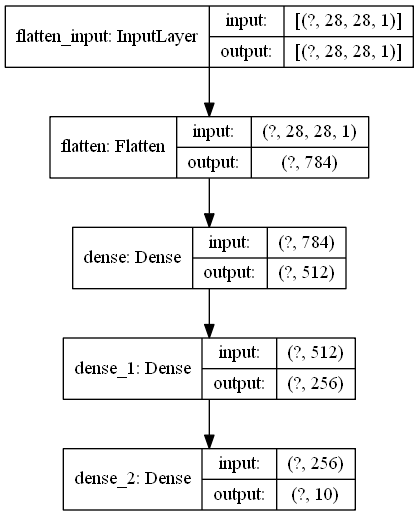

In [2]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential()
model.add(Flatten(input_shape=(28,28,1))),
model.add(Dense(512, activation='relu')),
model.add(Dense(256, activation='relu')),
model.add(Dense(10, activation='softmax'))

model.summary()
plot_model(model, show_shapes=True)

### 또는

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


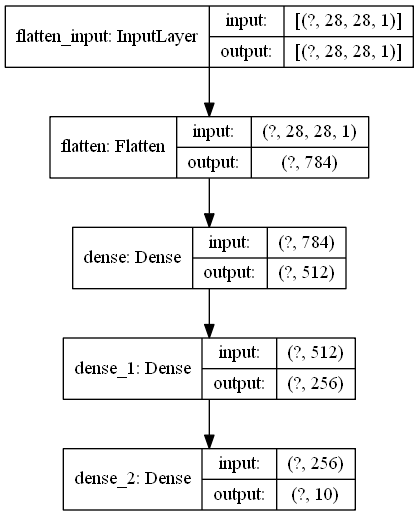

In [3]:
tf.keras.backend.clear_session()

model = tf.keras.models.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(10, activation='softmax')
])

model.summary()
plot_model(model, show_shapes=True)

## 2. Functional API

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1792        input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   36928       conv2d[0][0]                     
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 32, 32, 67)   0           input_1[0][0]                    
                                                                 conv2d_1[0][0]        

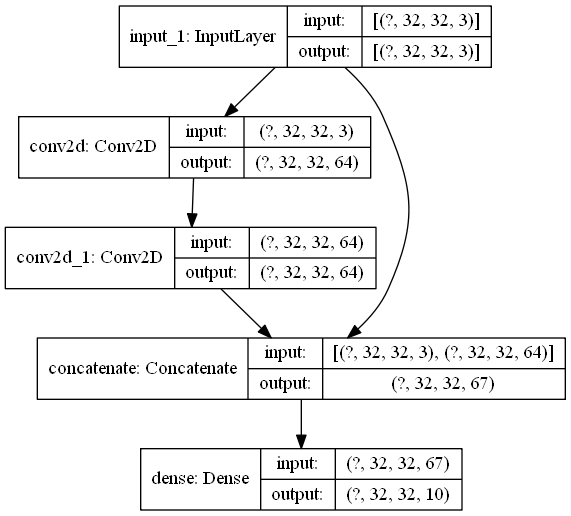

In [4]:
tf.keras.backend.clear_session()

_input_ = tf.keras.Input((32, 32, 3))
x = Conv2D(64, 3, padding='same', activation='relu')(_input_)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
c = tf.keras.layers.Concatenate()([_input_, x])
_output_ = Dense(10, activation='softmax')(c)

model = tf.keras.Model(_input_, _output_)

model.summary()
plot_model(model, show_shapes=True)

### 또는

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   36928       conv2d[0][0]                     
_______________________________________________________________________________________

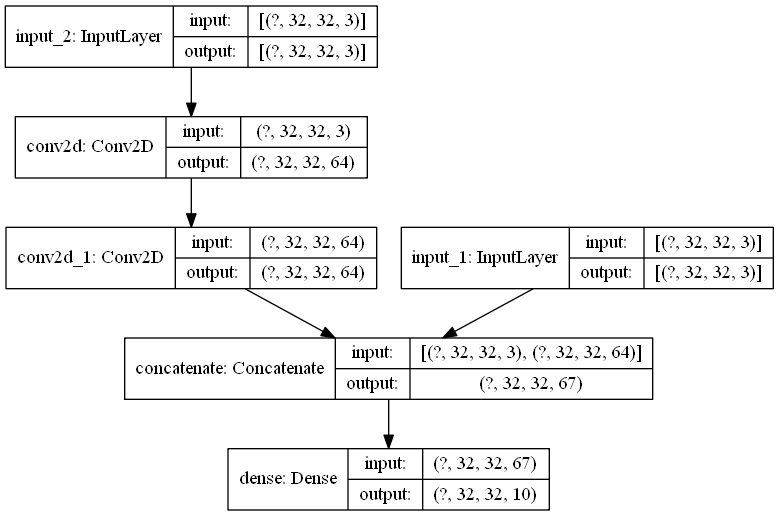

In [5]:
tf.keras.backend.clear_session()

_input1_ = tf.keras.Input((32, 32, 3))
_input2_ = tf.keras.Input((32, 32, 3))
x = Conv2D(64, 3, padding='same', activation='relu')(_input2_)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
c = tf.keras.layers.Concatenate()([_input1_, x])
_output_ = Dense(10, activation='softmax')(c)

model = tf.keras.Model([_input1_, _input2_], _output_)

model.summary()
plot_model(model, show_shapes=True)

### 또는

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1792        input_2[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 32, 32, 64)   36928       conv2d[0][0]                     
__________________________________________________________________________________________________
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
_______________________________________________________________________________________

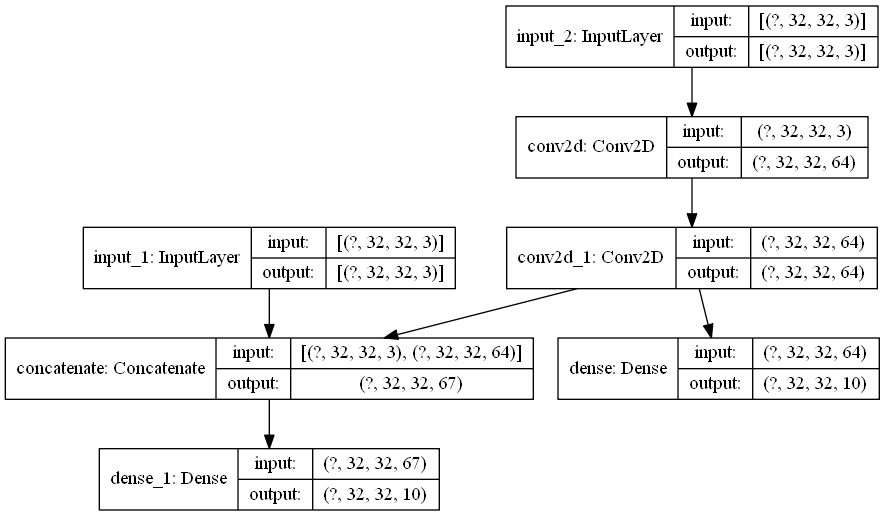

In [6]:
tf.keras.backend.clear_session()

_input1_ = tf.keras.Input((32, 32, 3))
_input2_ = tf.keras.Input((32, 32, 3))
x = Conv2D(64, 3, padding='same', activation='relu')(_input2_)
x = Conv2D(64, 3, padding='same', activation='relu')(x)
_output1_ = Dense(10, activation='softmax')(x)
c = tf.keras.layers.Concatenate()([_input1_, x])
_output2_ = Dense(10, activation='softmax')(c)

model = tf.keras.Model([_input1_, _input2_], [_output1_, _output2_])

model.summary()
plot_model(model, show_shapes=True)

## 3. Model Subclassing